In [44]:
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_squared_log_error,r2_score
from sklearn.cross_validation import cross_val_score,cross_val_predict
from sklearn.linear_model import Ridge,Lasso
import statsmodels.formula.api as smf
plt.rc('figure',figsize=(15,7))

In [45]:
dataframe=pd.read_csv('/Users/akhilmaddu/Desktop/hour.csv')

In [46]:
dataframe.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [47]:
df=dataframe

# Feature selection

In [48]:
df=df.drop(['dteday','casual','registered','instant','yr'],axis=1)

In [49]:
df=df.drop('atemp',axis=1)

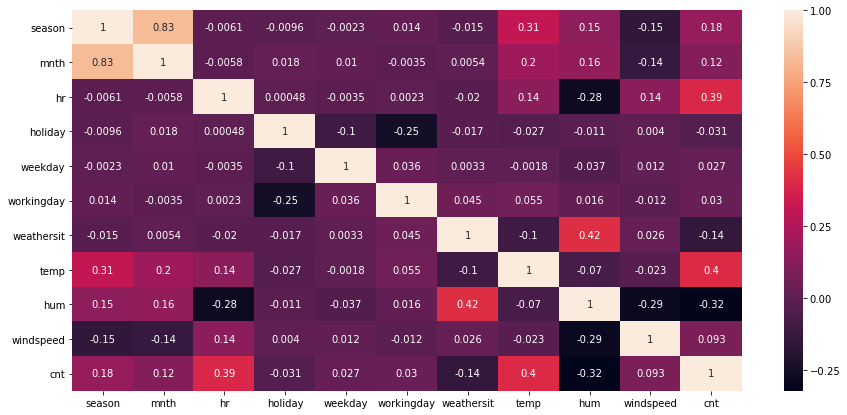

In [50]:
correlation = df.corr()
sns.heatmap(correlation,annot=True)
plt.show()

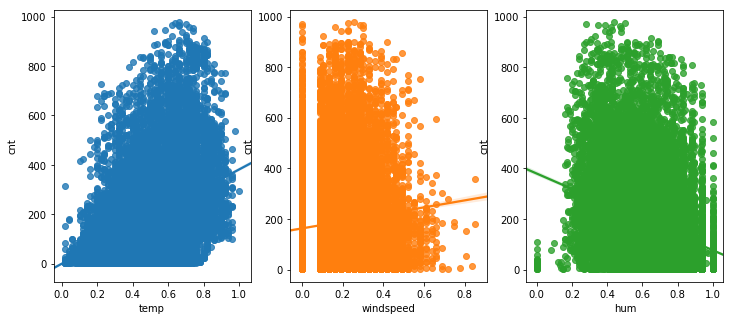

In [51]:
fig, axs= plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sns.regplot(x="temp", y="cnt", data=df,ax=axs[0])
sns.regplot(x="windspeed", y="cnt", data=df,ax=axs[1])
sns.regplot(x="hum", y="cnt", data=df,ax=axs[2])
plt.show()

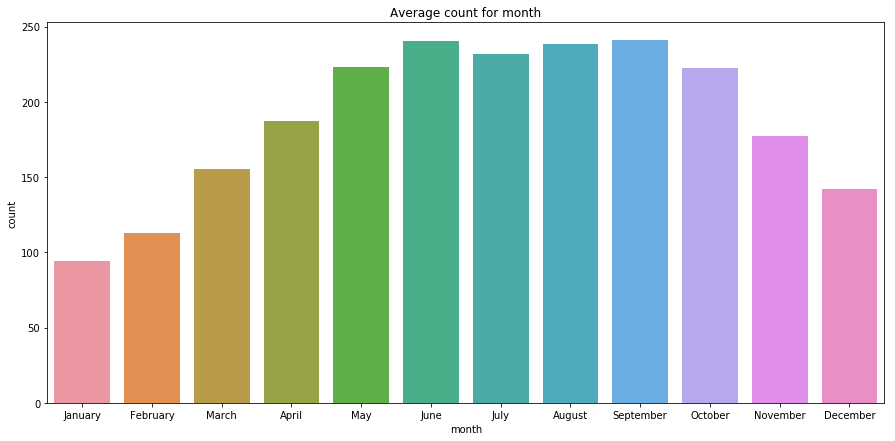

In [52]:
months = ["January","February","March","April","May","June","July","August","September","October","November","December"]
month_count=pd.DataFrame(df.groupby("mnth")["cnt"].mean()).reset_index()
sns.barplot(data=month_count,x="mnth",y="cnt",label=months)
plt.xticks(np.arange(0,12),months)
plt.xlabel("month")
plt.ylabel("count")
plt.title("Average count for month")
plt.show()

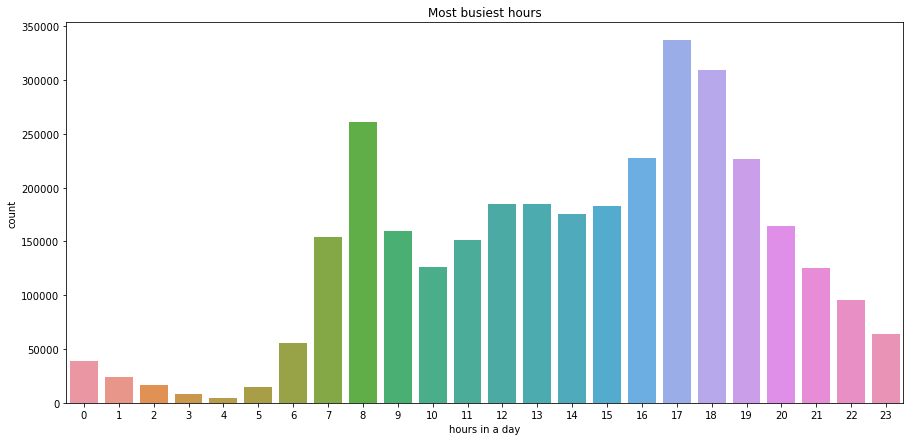

In [53]:
hours=[]
for i in range(0,24):
    d=np.sum(df[df['hr']==i]['cnt'].values.tolist())
    hours.append(d)
sns.barplot(np.arange(0,24),hours)
plt.title("Most busiest hours")
plt.xlabel("hours in a day")
plt.ylabel("count")
plt.show()

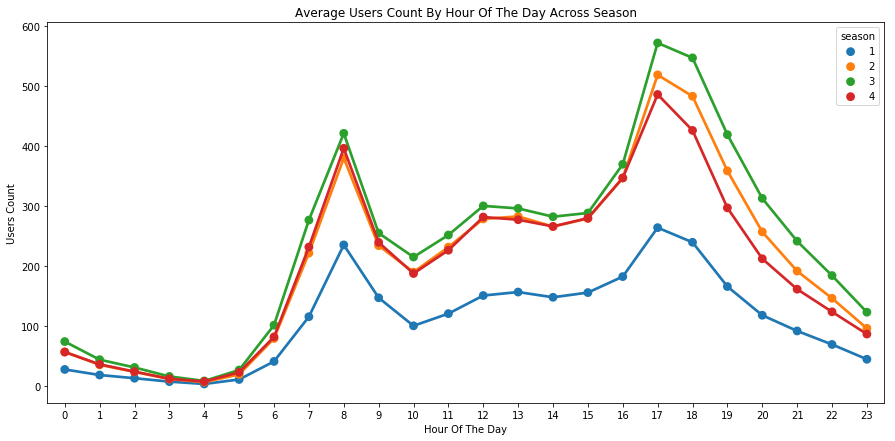

In [54]:
hourAggregated = pd.DataFrame(df.groupby(["hr","season"],sort=True)["cnt"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hr"], y=hourAggregated["cnt"],hue=hourAggregated["season"], data=hourAggregated, join=True)
plt.xlabel('Hour Of The Day')
plt.ylabel('Users Count')
plt.title("Average Users Count By Hour Of The Day Across Season")
plt.show()

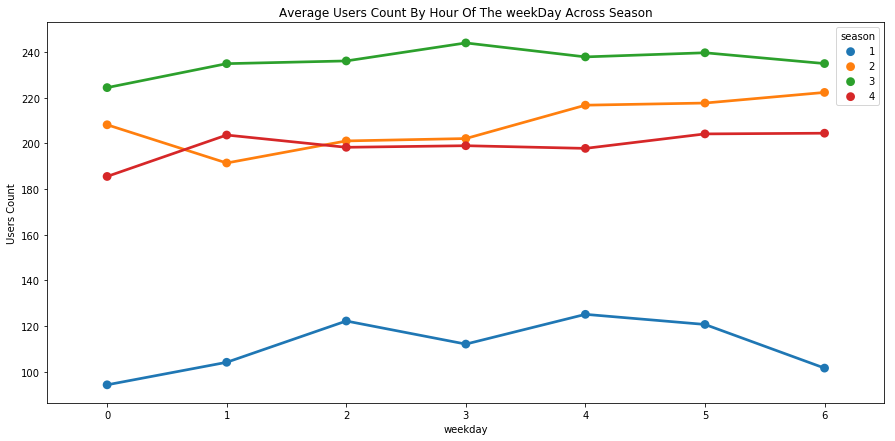

In [80]:
hourAggregated = pd.DataFrame(df.groupby(["weekday","season"],sort=True)["cnt"].mean()).reset_index()
sns.pointplot(x=hourAggregated["weekday"], y=hourAggregated["cnt"],hue=hourAggregated["season"], data=hourAggregated, join=True)
plt.xlabel('weekday')
plt.ylabel('Users Count')
plt.title("Average Users Count By Hour Of The weekDay Across Season")
plt.show()

In [81]:
len(X_test)

5736

## Test train split

In [56]:
target = df['cnt']
data = df.drop('cnt', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33)

# Linear Regression

In [57]:
model1 = smf.OLS(y_train,X_train).fit()

In [58]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     2509.
Date:                Thu, 16 Nov 2017   Prob (F-statistic):               0.00
Time:                        11:11:55   Log-Likelihood:                -74689.
No. Observations:               11643   AIC:                         1.494e+05
Df Residuals:                   11633   BIC:                         1.495e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season        22.4704      2.298      9.776      0.000      17.965      26.976
mnth          -0.2249      0.721     -0.312      0.755      -1.639       1.189
hr             7.8746      0.198     39.745      0.000       7.486       8.263
holiday      -18.9844      8.419     -2.255      0.024     -35.487      -2.482
weekday        2.7914      0.662      4.216      0.000       1.494       4.089
workingday     7.2089      2.976      2.423      0.015       1.376      13.042
weathersit     0.9642      2.404      0.401      0.688      -3.748       5.677
temp         299.8245      7.252     41.344      0.000     285.609     314.040
hum         -200.3108      7.056    -28.390      0.000    -214.141    -186.480
windspeed     33.3206     10.836      3.075      0.002      12.081      54.560
==============================================================================
Omnibus:                     2758.703   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6166.343
Skew:                           1.355   Prob(JB):                         0.00
Kurtosis:                       5.318   Cond. No.                         122.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
prediction = model1.predict(X_test)
rmse = sqrt(mean_squared_error(y_test,prediction))
print("Root Mean Squared Error:(statsmodel)",rmse)

Root Mean Squared Error:(statsmodel) 147.43183425510458


In [60]:
LRclassifier = LinearRegression()
LRclassifier.fit(X_train,y_train)
LRpred = LRclassifier.predict(X_test)

In [61]:
print("Root Mean Squared Error:",sqrt(mean_squared_error(y_test,LRpred)))

Root Mean Squared Error: 147.27895420871462


# Feature importance using RandomForest

In [62]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), df), reverse=True))

Features sorted by their score:
[(0.60509999999999997, 'hr'), (0.15679999999999999, 'temp'), (0.0613, 'hum'), (0.050000000000000003, 'workingday'), (0.031899999999999998, 'windspeed'), (0.0252, 'mnth'), (0.0241, 'season'), (0.022800000000000001, 'weekday'), (0.019699999999999999, 'weathersit'), (0.0030000000000000001, 'holiday')]


# forward step regression(linear)

In [63]:
o=['hr','temp','workingday','hum','windspeed','season','mnth','weathersit','weekday','holiday']
p=[]
for i in o:
    p.append(i)
    print(p)
    m=df[p]
    n=df['cnt']
    X_train1, X_test1, y_train1, y_test1 = train_test_split(m, n, test_size=0.33)
    LRclassifier1=LinearRegression()
    LRclassifier1.fit(X_train1,y_train1)
    y_pred1=LRclassifier1.predict(X_test1)
    print(sqrt(mean_squared_error(y_test1 ,y_pred1)))

['hr']
166.1451089644266
['hr', 'temp']
153.7549430605862
['hr', 'temp', 'workingday']
153.04879796361917
['hr', 'temp', 'workingday', 'hum']
148.59159673588192
['hr', 'temp', 'workingday', 'hum', 'windspeed']
149.06038206168301
['hr', 'temp', 'workingday', 'hum', 'windspeed', 'season']
148.89818422293123
['hr', 'temp', 'workingday', 'hum', 'windspeed', 'season', 'mnth']
144.65807576028934
['hr', 'temp', 'workingday', 'hum', 'windspeed', 'season', 'mnth', 'weathersit']
147.1353976722404
['hr', 'temp', 'workingday', 'hum', 'windspeed', 'season', 'mnth', 'weathersit', 'weekday']
145.26245688251137
['hr', 'temp', 'workingday', 'hum', 'windspeed', 'season', 'mnth', 'weathersit', 'weekday', 'holiday']
149.39365025838111


# Ridge and Lasso

In [64]:
rmsError = []
alphaList1 = [0.1**i for i in [0,1, 2, 3, 4, 5, 6]]
for alph in alphaList1:
    RidgeModel = Ridge(alpha=alph)
    RidgeModel.fit(X_train, y_train)
    rmsError.append(np.linalg.norm((y_test-RidgeModel.predict(X_test)), 2)/sqrt(len(y_test)))

In [65]:
rmsError

[147.27997107724485,
 147.27904587066052,
 147.27896327402738,
 147.27895511423645,
 147.27895429925672,
 147.27895421776876,
 147.27895420962003]

In [66]:
LassoRmsError = []
alphaList2 = [0.1**i for i in range(0,1000,50)]
for alph in alphaList2:
    Lassomodel = Lasso(alpha=alph)
    Lassomodel.fit(X_train, y_train)
    LP = Lassomodel.predict(X_test)
    LassoRmsError.append(np.linalg.norm((y_test-Lassomodel.predict(X_test)), 2)/sqrt(len(y_test)))

/Users/akhilmaddu/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/akhilmaddu/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """
/Users/akhilmaddu/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)


In [67]:
LassoRmsError

[147.53706860165366,
 147.27895420871462,
 147.27895420871462,
 147.27895420871462,
 147.27895420871462,
 147.27895420871462,
 147.27895420871462,
 147.27895420871462,
 147.27895420871462,
 147.27895420871462,
 147.27895420871462,
 147.27895420871462,
 147.27895420871462,
 147.27895420871462,
 147.27895420871462,
 147.27895420871462,
 147.27895420871462,
 147.27895420871462,
 147.27895420871462,
 147.27895420871462]

# Random forest

In [68]:
from sklearn.ensemble import RandomForestRegressor
RFmodel = RandomForestRegressor()
RFmodel.fit(X_train,y_train)
RFpred = RFmodel.predict(X_test)
print("RMSLE:",sqrt(mean_squared_log_error(y_test,RFpred)))

RMSLE: 0.42815829925722315


In [69]:
np.sum(RFpred1)

1095358.3065019972

In [70]:
print("Actual count",np.sum(y_test))
print("Predicted count",np.sum(RFpred1))

Actual count 1083490
Predicted count 1095358.3065


In [71]:
RFmodel = RandomForestRegressor(max_depth=20,min_samples_leaf=3)
RFmodel.fit(X_train,y_train)
RFpred1 = RFmodel.predict(X_test)
print("RMSLE After tuning parameter:",sqrt(mean_squared_log_error(y_test,RFpred1)))

RMSLE After tuning parameter: 0.4264598458493715


In [72]:
r2_score(y_test,RFpred)

0.84693718904917192

### cross validation

In [73]:
np.mean(cross_val_score(RFmodel,X_train,y_train,cv=10))#crossvalidation with 10 folds

0.84729877361042261

# Tuning random forest

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
param_grid2 = {'max_depth': [10, 15, 20],
              'min_samples_leaf': [3, 5, 10, 20],
}
#param_grid={'n_estimators':[10,100,150,200]}
grid=GridSearchCV(RFmodel,param_grid2)
grid.fit(data,target)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [10, 15, 20], 'min_samples_leaf': [3, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [76]:
grid.grid_scores_

/Users/akhilmaddu/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.45917, std: 0.14821, params: {'max_depth': 10, 'min_samples_leaf': 3},
 mean: 0.45917, std: 0.14808, params: {'max_depth': 10, 'min_samples_leaf': 5},
 mean: 0.46125, std: 0.14012, params: {'max_depth': 10, 'min_samples_leaf': 10},
 mean: 0.46059, std: 0.13921, params: {'max_depth': 10, 'min_samples_leaf': 20},
 mean: 0.45755, std: 0.16078, params: {'max_depth': 15, 'min_samples_leaf': 3},
 mean: 0.46252, std: 0.15399, params: {'max_depth': 15, 'min_samples_leaf': 5},
 mean: 0.45047, std: 0.15516, params: {'max_depth': 15, 'min_samples_leaf': 10},
 mean: 0.45081, std: 0.14600, params: {'max_depth': 15, 'min_samples_leaf': 20},
 mean: 0.46162, std: 0.16134, params: {'max_depth': 20, 'min_samples_leaf': 3},
 mean: 0.45920, std: 0.15551, params: {'max_depth': 20, 'min_samples_leaf': 5},
 mean: 0.45772, std: 0.14875, params: {'max_depth': 20, 'min_samples_leaf': 10},
 mean: 0.44786, std: 0.14988, params: {'max_depth': 20, 'min_samples_leaf': 20}]

In [77]:
grid.best_params_

{'max_depth': 15, 'min_samples_leaf': 5}

# GradientBoostingRegressor

In [78]:
from sklearn.ensemble import GradientBoostingRegressor
est_casual = GradientBoostingRegressor(n_estimators=80, learning_rate = .05)
est_registered = GradientBoostingRegressor(n_estimators=80, learning_rate = .05)

In [82]:
df1_y=df1['log-casual']
df1=df1.drop(['dteday','log-registered','instant','yr','log-cnt','atemp','log-casual'],axis=1)
#df1_y=dataframe['casual']
X_train1, X_test1, y_train1, y_test1 = train_test_split(df1,df1_y, test_size=0.33)
est_casual.fit(X_train1, y_train1)
casual_pred=est_casual.predict(X_test1)
print("RMSE:",sqrt(mean_squared_error(y_test1,casual_pred)))


NameError: name 'df1' is not defined

In [ ]:
df2_y=df2['log-registered']
df2=df2.drop(['dteday','log-registered','instant','yr','log-cnt','atemp','log-casual'],axis=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(df2,df2_y, test_size=0.33)
est_registered.fit(X_train2, y_train2)
reg_pred=est_casual.predict(X_test2)
print("RMSE:",sqrt(mean_squared_error(y_test2,reg_pred)))


In [ ]:
def merge_predict(model1,model2,test_data):
    p1 = np.expm1(model1.predict(test_data))
    p2 = np.expm1(model2.predict(test_data))
    p_total = p1 + p2
    print(p1)
    return p_total

In [ ]:
result3 = merge_predict(est_casual, est_registered, X_test1)

In [ ]:
sqrt(mean_squared_log_error(y_test,result3))

In [ ]:
df1 = dataframe

In [ ]:
for col in ['casual', 'registered','cnt']:
        df1['log-' + col] = df1[col].apply(lambda x: np.log1p(x))

In [ ]:
df1 = df1.drop(['cnt','casual','registered'],axis=1)


In [ ]:
df1

In [ ]:
df2 = dataframe

In [ ]:
for col in ['casual', 'registered','cnt']:
        df2['log-' + col] = df2[col].apply(lambda x: np.log1p(x))

In [ ]:
df2 = df2.drop(['cnt','casual','registered'],axis=1)